In [2]:
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM', 'BAC', 'LMT']

end_date = datetime.now()
start_date = end_date - \
            timedelta(days=1095) # 3 years of data

tickers = yf.download(tickers, start = start_date, end = end_date,auto_adjust=False)['Adj Close']
tickers = pd.DataFrame(tickers)

[*********************100%***********************]  7 of 7 completed


In [4]:
returns = tickers.pct_change()*100 # Calculate daily returns and drop NaN values
returns = returns.dropna() # Drop NaN values

In [5]:
# Calculate the mean and variance of the returns
mean_returns = returns.mean() # Mean returns
variance_returns = returns.var() # Variance of returns

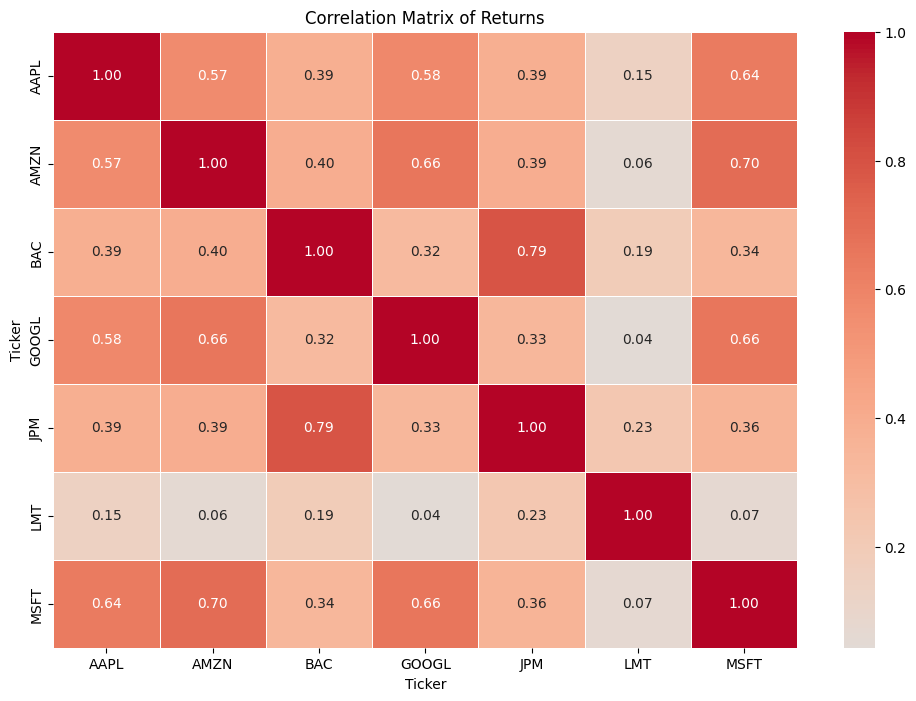

In [6]:
# Correlation matrix
returns.corr()

# Assuming `returns` is your DataFrame of returns
corr_matrix = returns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Optional: adjust the size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Returns')
plt.show()

In [7]:
returns

Ticker,AAPL,AMZN,BAC,GOOGL,JPM,LMT,MSFT
Date,,,,,,,
2022-05-25,0.113979,2.569648,0.532950,-0.155712,0.696416,1.075022,1.117007
2022-05-26,2.319967,4.029499,2.315850,1.878455,1.729019,0.100547,1.287546
2022-05-27,4.075661,3.663208,0.954452,4.196944,1.413796,0.573665,2.760424
2022-05-31,-0.534596,4.397010,0.486230,1.287001,0.731295,-1.708509,-0.501395
2022-06-01,-0.087340,1.226604,-1.424731,0.114265,-1.754499,-0.184037,0.202308
...,...,...,...,...,...,...,...
2025-05-16,-0.089857,0.204707,0.698507,1.360085,0.026172,0.683664,0.251580
2025-05-19,-1.173907,0.277254,0.179015,0.210597,-1.001642,1.012126,1.012615
2025-05-20,-0.919627,-1.013774,-0.178695,-1.537167,0.302019,0.583438,-0.152545


In [8]:
# Calculate Annual returns
annual_returns = (1 + mean_returns / 100) ** 252 - 1 # Annual returns
print(annual_returns)


Ticker
AAPL     0.182476
AMZN     0.335555
BAC      0.139516
GOOGL    0.240414
JPM      0.351435
LMT      0.071712
MSFT     0.262171
dtype: float64


In [9]:
# Calculate annual STD
annual_std = tickers.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))# Annual standard deviation
print(annual_std)

Ticker
AAPL     0.285649
AMZN     0.359317
BAC      0.276281
GOOGL    0.326333
JPM      0.246817
LMT      0.211111
MSFT     0.268230
dtype: float64


In [10]:
assets = pd.concat([annual_returns, annual_std], axis=1) # Concatenate annual returns and annual STD
assets.columns = ['Returns', 'Volatility'] # Rename columns
print(assets)

         Returns  Volatility
Ticker                      
AAPL    0.182476    0.285649
AMZN    0.335555    0.359317
BAC     0.139516    0.276281
GOOGL   0.240414    0.326333
JPM     0.351435    0.246817
LMT     0.071712    0.211111
MSFT    0.262171    0.268230


In [11]:
# Calculate Covariance matrix
cov_matrix = tickers.pct_change().apply(lambda x: np.log(1+x)).cov()
print(cov_matrix)

Ticker      AAPL      AMZN       BAC     GOOGL       JPM       LMT      MSFT
Ticker                                                                      
AAPL    0.000326  0.000233  0.000124  0.000215  0.000110  0.000034  0.000194
AMZN    0.000233  0.000516  0.000158  0.000309  0.000140  0.000018  0.000269
BAC     0.000124  0.000158  0.000305  0.000115  0.000216  0.000045  0.000100
GOOGL   0.000215  0.000309  0.000115  0.000426  0.000107  0.000011  0.000231
JPM     0.000110  0.000140  0.000216  0.000107  0.000244  0.000048  0.000094
LMT     0.000034  0.000018  0.000045  0.000011  0.000048  0.000178  0.000015
MSFT    0.000194  0.000269  0.000100  0.000231  0.000094  0.000015  0.000288


In [12]:
# Simulate portfolio
portfolio_returns = []
portfolio_volatility = []
assets_weights = []
num_assets = len(tickers.columns) # Number of assets in the portfolio
num_portfolios = 5000 # Number of portfolios to simulate

In [13]:
# Loop through each portfolio 
for portfolio in range(num_portfolios):
    # Randomly assign weights to each asset in the portfolio
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # Normalize weights to sum to 1

    # Calculate portfolio return
    assets_weights.append(weights)
    returns = np.dot(weights, annual_returns)

    portfolio_returns.append(returns) # Append portfolio return to list
    variance = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Calculate portfolio variance
    std = np.sqrt(variance) # Calculate portfolio standard deviation
    annual_std = std * np.sqrt(252) # Annualize the standard deviation
    portfolio_volatility.append(annual_std) # Append portfolio standard deviation to list

In [14]:
# Create a DataFrame to store the results
results ={
    'Returns': portfolio_returns, 
    'Volatility': portfolio_volatility
    } # Create a dictionary to store results

for counter, symbol in enumerate(tickers.columns.tolist()):
    results[symbol+'Weight'] = [w[counter] for w in assets_weights] # Add weights for each asset to the results

# Create a DataFrame from the results dictionary
results = pd.DataFrame(results)


In [15]:
# Create a scatter plot of the portfolios
portfolios = pd.DataFrame(results) # Create a DataFrame from the results dictionary
portfolios.head()

,Returns,Volatility,AAPLWeight,AMZNWeight,BACWeight,GOOGLWeight,JPMWeight,LMTWeight,MSFTWeight
0,0.215701,0.189033,0.183308,0.048564,0.085332,0.155850,0.168315,0.192131,0.166500
1,0.274269,0.221396,0.065804,0.230088,0.061956,0.049478,0.218601,0.054501,0.319572
2,0.230026,0.216134,0.087605,0.158455,0.070752,0.351477,0.121161,0.164241,0.046310
3,0.214677,0.181477,0.090924,0.101527,0.162378,0.073292,0.234043,0.247189,0.090647
4,0.191833,0.193484,0.081616,0.151466,0.246238,0.189619,0.053552,0.238380,0.039130


<Axes: title={'center': 'Efficieny Frontier'}, xlabel='Volatility', ylabel='Returns'>

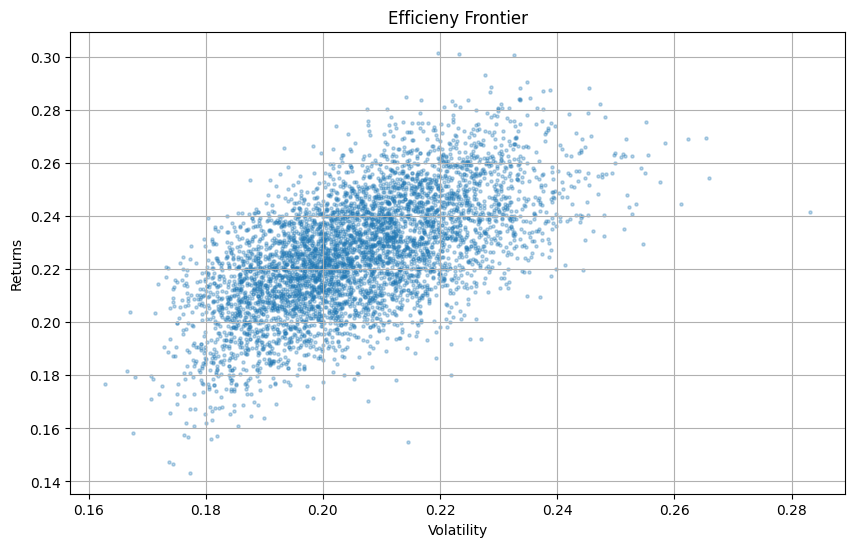

In [16]:
# Plot the efficient frontier
portfolios.plot.scatter(
    x ='Volatility', 
    y ='Returns', 
    marker ='o', 
    s = 5, 
    alpha = 0.3,
    grid=True,
    figsize=(10, 6),
    title='Efficieny Frontier'
)


In [17]:
min_vol_portfolio = portfolios.loc[portfolios['Volatility'].idxmin()] # Portfolio with minimum volatility
min_vol_portfolio

Returns        0.176569
Volatility     0.162878
AAPLWeight     0.003082
AMZNWeight     0.008806
BACWeight      0.017575
GOOGLWeight    0.001172
JPMWeight      0.189784
LMTWeight      0.529049
MSFTWeight     0.250531
Name: 3742, dtype: float64

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/3055945735.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/3055945735.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],


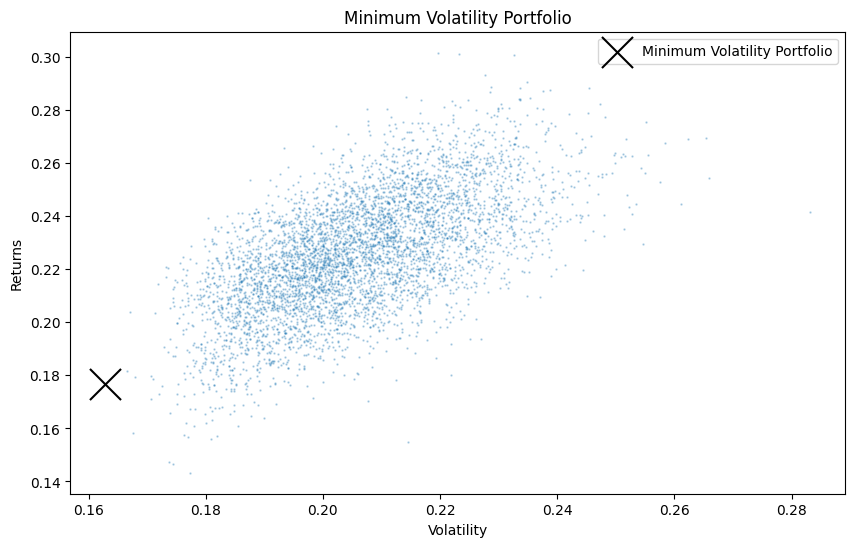

In [18]:
# Plot minimum volatility portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=0.5, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='x',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Minimum Volatility Portfolio')
plt.legend()



Text(0.5, 1.0, 'Efficient Frontier with all assets colour coded')

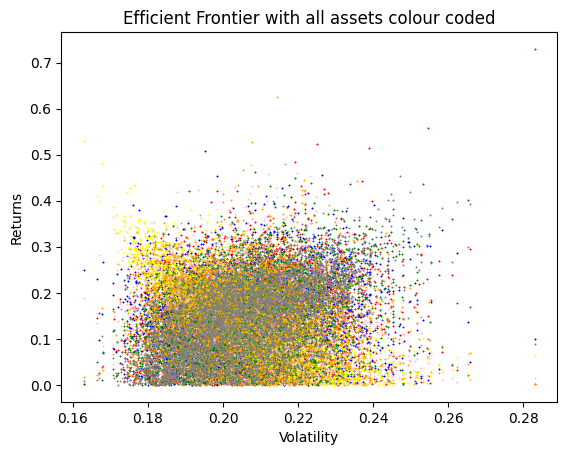

In [19]:
plt.scatter(
    portfolios['Volatility'],
    portfolios['AAPLWeight'],  
    color='red', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['MSFTWeight'],    
    color='blue', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['LMTWeight'],  
    color='yellow', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['JPMWeight'],  
    color='pink', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['GOOGLWeight'],  
    color='green', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['BACWeight'],  
    color='orange', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['AMZNWeight'],  
    color='gray', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier with all assets colour coded')

 

In [20]:
# Optimnal Portfolio
rf = 0.02
opt_risk_portfolio = portfolios.iloc[((portfolios['Returns'] - rf) / portfolios['Volatility']).idxmax()] # Portfolio with maximum Sharpe ratio
opt_risk_portfolio

Returns        0.301685
Volatility     0.219594
AAPLWeight     0.118470
AMZNWeight     0.212944
BACWeight      0.010288
GOOGLWeight    0.093527
JPMWeight      0.461286
LMTWeight      0.023896
MSFTWeight     0.079587
Name: 4649, dtype: float64

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1588029456.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1588029456.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1588029456.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  opt_r

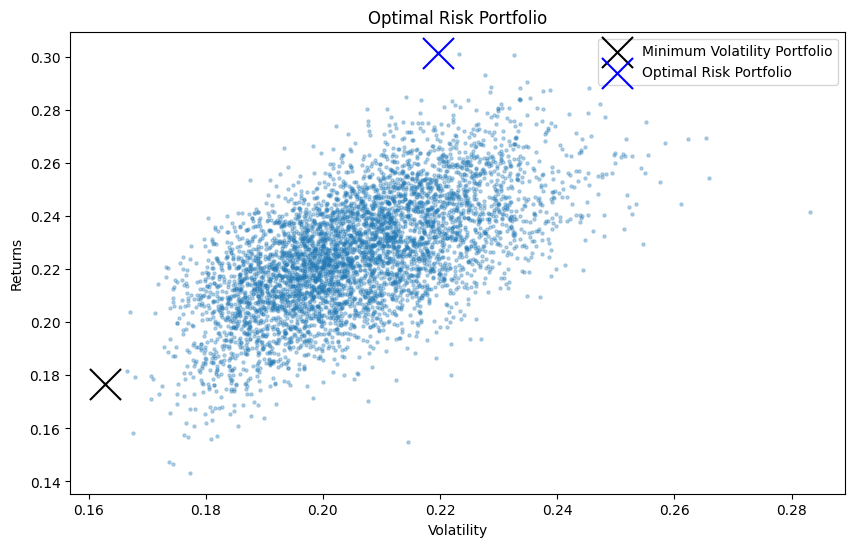

In [21]:
# Plot optimal portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=5, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='x',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    opt_risk_portfolio[1], 
    opt_risk_portfolio[0], 
    color='blue', 
    marker='x', 
    s=500, 
    label='Optimal Risk Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Optimal Risk Portfolio')
plt.legend()


/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1602003358.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1602003358.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1602003358.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  opt_r

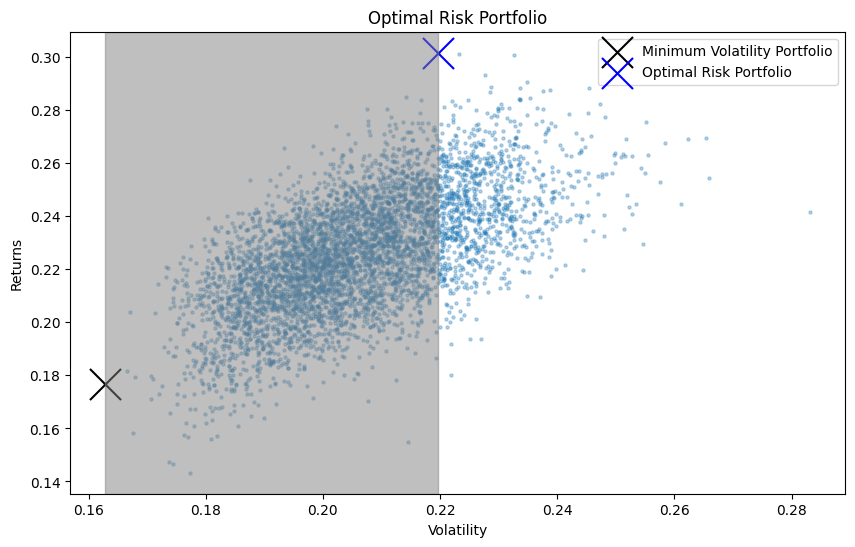

In [22]:
# Plot optimal portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=5, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='x',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    opt_risk_portfolio[1], 
    opt_risk_portfolio[0], 
    color='blue', 
    marker='x', 
    s=500, 
    label='Optimal Risk Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Optimal Risk Portfolio')
plt.legend()
plt.axvspan( min_vol_portfolio[1], opt_risk_portfolio[1], alpha=0.5, color='gray')

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1454124843.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_return = min_vol_portfolio[0]
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1454124843.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_volatility = min_vol_portfolio[1]
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_11859/1454124843.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

OSError: [Errno 30] Read-only file system: 'efficient_frontier.png'

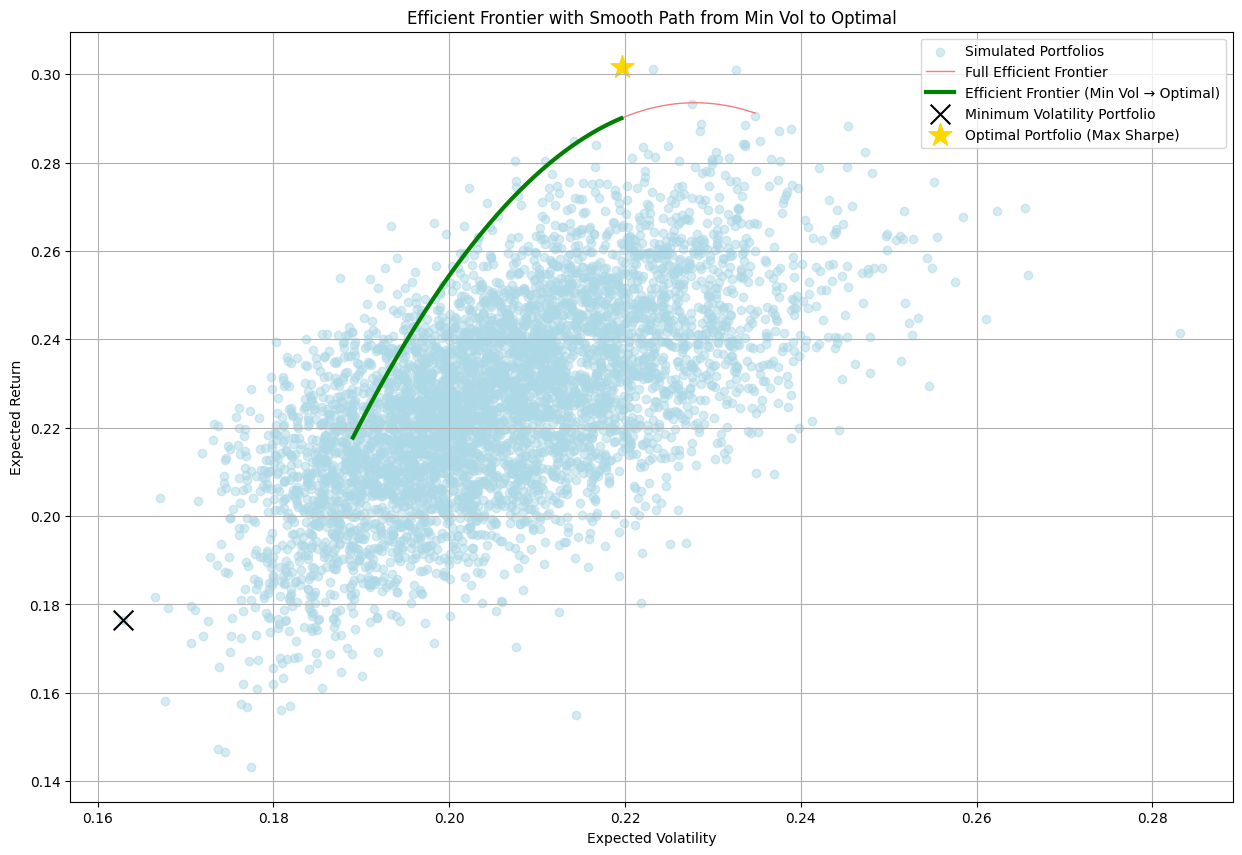

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Rename for consistency
portfolios = portfolios.rename(columns={'Returns': 'Return'})

# Step 1: Extract efficient frontier points by cumulative max Return (non-decreasing max return)
efficient_frontier = portfolios[portfolios['Return'] == portfolios['Return'].cummax()]

# Step 2: Fit 2nd-degree polynomial to efficient frontier points
coeffs = np.polyfit(efficient_frontier['Volatility'], efficient_frontier['Return'], deg=2)
poly = np.poly1d(coeffs)

# Step 3: Define smooth volatility range covering efficient frontier
vol_range = np.linspace(efficient_frontier['Volatility'].min(), efficient_frontier['Volatility'].max(), 500)
ret_smooth = poly(vol_range)

# Extract key portfolios
min_vol_return = min_vol_portfolio[0]
min_vol_volatility = min_vol_portfolio[1]
opt_return = opt_risk_portfolio[0]
opt_volatility = opt_risk_portfolio[1]

# Restrict smooth curve from minimum volatility to optimal volatility
mask = (vol_range >= min_vol_volatility) & (vol_range <= opt_volatility)
vol_smooth_segment = vol_range[mask]
ret_smooth_segment = ret_smooth[mask]

# Plot
plt.figure(figsize=(15, 10))

# Plot all portfolios as light blue dots
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Return'], 
    c='lightblue', 
    alpha=0.5, 
    label='Simulated Portfolios'
)

# Plot full efficient frontier polynomial curve (light red)
plt.plot(
    vol_range, 
    ret_smooth, 
    color='lightcoral', 
    linewidth=1, 
    label='Full Efficient Frontier'
)

# Plot smooth segment between minimum volatility and optimal portfolio (thicker green)
plt.plot(
    vol_smooth_segment,
    ret_smooth_segment,
    color='green',
    linewidth=3,
    label='Efficient Frontier (Min Vol → Optimal)'
)

# Highlight minimum volatility portfolio
plt.scatter(
    min_vol_volatility, 
    min_vol_return, 
    c='black', 
    marker='x', 
    s=200, 
    label='Minimum Volatility Portfolio'
)

# Highlight optimal portfolio (Max Sharpe)
plt.scatter(
    opt_volatility, 
    opt_return, 
    c='gold', 
    marker='*', 
    s=300, 
    label='Optimal Portfolio (Max Sharpe)'
)

# Labels, legend, grid, save
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Smooth Path from Min Vol to Optimal')
plt.legend()
plt.grid(True)
plt.savefig('efficient_frontier.png')
print("Efficient frontier plot saved to efficient_frontier.png")
plt.show()
